# Exploring Drivers general data
- drivers.csv
- results.csv


http://ergast.com/docs/f1db_user_guide.txt

## TODO
- Points by year
- Positions by year


In [24]:
# Imports
import pandas as pd
pd.options.mode.chained_assignment = None 

In [25]:
#Read Files
drivers = pd.read_csv("data/drivers.csv")
results = pd.read_csv("data/results.csv")


In [26]:
drivers_reduce=drivers[["driverId","driverRef","nationality"]]
drivers_reduce["name"]=drivers["forename"]+" "+ drivers["surname"]
drivers_reduce

,driverId,driverRef,nationality,name
0,1,hamilton,British,Lewis Hamilton
1,2,heidfeld,German,Nick Heidfeld
2,3,rosberg,German,Nico Rosberg
3,4,alonso,Spanish,Fernando Alonso
4,5,kovalainen,Finnish,Heikki Kovalainen
...,...,...,...,...
852,854,mick_schumacher,German,Mick Schumacher
853,855,zhou,Chinese,Guanyu Zhou
854,856,de_vries,Dutch,Nyck de Vries
855,857,piastri,Australian,Oscar Piastri


In [27]:
results_reduce = results[["driverId","position","points"]]
results_reduce

,driverId,position,points
0,1,1,10.0
1,2,2,8.0
2,3,3,6.0
3,4,4,5.0
4,5,5,4.0
...,...,...,...
25835,854,16,0.0
25836,825,17,0.0
25837,1,18,0.0
25838,849,19,0.0


In [28]:
#Test 
prueba=results_reduce.loc[results_reduce["driverId"]==4]
prueba.loc[prueba["position"]=="1"].count()

driverId    32
position    32
points      32
dtype: int64

In [29]:
#Sum points
results_points=results_reduce.groupby("driverId")["points"].sum().reset_index(name="points")
results_points

,driverId,points
0,1,4396.5
1,2,259.0
2,3,1594.5
3,4,2061.0
4,5,105.0
...,...,...
850,852,44.0
851,853,0.0
852,854,12.0
853,855,6.0


In [30]:
drivers_points = drivers_reduce.merge(results_points, on='driverId', how='inner', suffixes=('_1', '_2'))
drivers_points

,driverId,driverRef,nationality,name,points
0,1,hamilton,British,Lewis Hamilton,4396.5
1,2,heidfeld,German,Nick Heidfeld,259.0
2,3,rosberg,German,Nico Rosberg,1594.5
3,4,alonso,Spanish,Fernando Alonso,2061.0
4,5,kovalainen,Finnish,Heikki Kovalainen,105.0
...,...,...,...,...,...
850,852,tsunoda,Japanese,Yuki Tsunoda,44.0
851,853,mazepin,Russian,Nikita Mazepin,0.0
852,854,mick_schumacher,German,Mick Schumacher,12.0
853,855,zhou,Chinese,Guanyu Zhou,6.0


In [49]:
#Podiums
results_podiums = results_reduce.groupby(["driverId","position"])["position"].count().reset_index(name="number")
results_podiums

,driverId,position,number
0,1,1,103
1,1,10,3
2,1,12,4
3,1,13,3
4,1,14,1
...,...,...,...
4815,855,15,1
4816,855,16,4
4817,855,8,1
4818,855,\N,5


In [55]:
driver_all_positions= drivers_reduce.merge(results_podiums, on='driverId', how='inner', suffixes=('_1', '_2'))
driver_all_positions =driver_all_positions[["name","position","number"]]

driver_all_positions = driver_all_positions.replace(r'\\N', "NF", regex=True)
driver_all_positions

,name,position,number
0,Lewis Hamilton,1,103
1,Lewis Hamilton,10,3
2,Lewis Hamilton,12,4
3,Lewis Hamilton,13,3
4,Lewis Hamilton,14,1
...,...,...,...
4815,Guanyu Zhou,15,1
4816,Guanyu Zhou,16,4
4817,Guanyu Zhou,8,1
4818,Guanyu Zhou,NF,5


In [32]:
# Get positions 1,2 and 3
filter = ["1", "2","3"]
results_podiums = results_podiums[results_podiums['position'].isin(filter)] 
results_podiums


,driverId,position,number
0,1,1,103
9,1,2,53
10,1,3,35
27,2,2,8
28,2,3,5
...,...,...,...
4721,846,3,5
4729,847,1,1
4740,847,2,2
4741,847,3,6


In [33]:
#Merge to get drivers name
drivers_positions = drivers_reduce.merge(results_podiums, on='driverId', how='inner', suffixes=('_1', '_2'))
drivers_positions_reduce =drivers_positions[["name","position","number"]]
drivers_positions_reduce


,name,position,number
0,Lewis Hamilton,1,103
1,Lewis Hamilton,2,53
2,Lewis Hamilton,3,35
3,Nick Heidfeld,2,8
4,Nick Heidfeld,3,5
...,...,...,...
430,Lando Norris,3,5
431,George Russell,1,1
432,George Russell,2,2
433,George Russell,3,6


In [34]:
#Colors and format
import seaborn as sns
sns.set_style('dark')
sns.color_palette("deep")

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

<AxesSubplot: title={'center': 'Drivers with most points'}, xlabel='Names', ylabel='Points'>

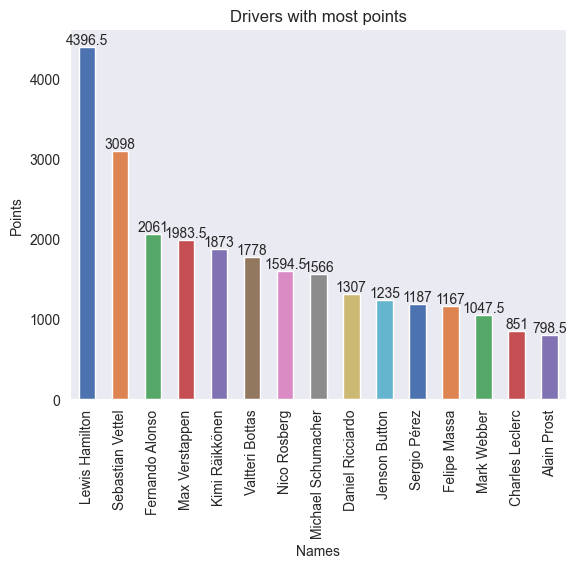

In [35]:
#Order by and plot drivers with more points
import seaborn as sns
sns.set_style('dark')
sns.color_palette("deep")
drivers_points_reduce=drivers_points[["name","points"]]
drivers_points_reduce_sorted=drivers_points_reduce.sort_values(by=["points"],ascending=False)
plot_most = drivers_points_reduce_sorted.iloc[0:15].plot.bar(x="name",y="points",color=sns.color_palette('deep'),legend=False)
#labels
plot_most.bar_label(plot_most.containers[0])
plot_most.set(xlabel="Names",ylabel="Points",title="Drivers with most points")
plot_most

<AxesSubplot: title={'center': 'Drivers with least points'}, xlabel='Names', ylabel='Points'>

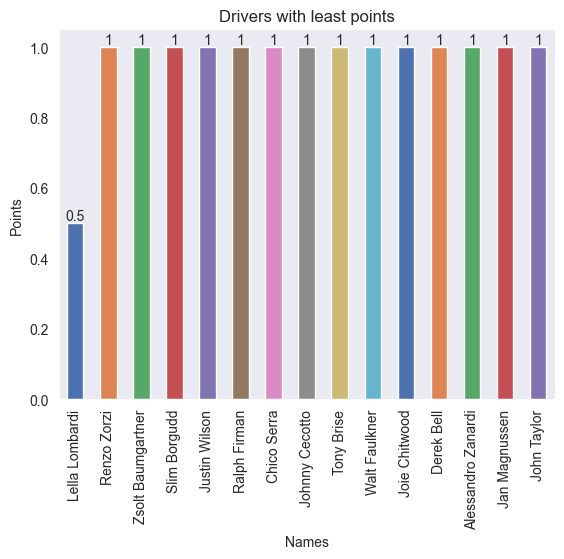

In [36]:
#Order by and plot drivers with less points (more than 0)
drivers_points_reduce_least=drivers_points[["name","points"]]
drivers_points_reduce_least=drivers_points_reduce_least[drivers_points_reduce_least.points != 0]
drivers_points_reduce_least_sorted=drivers_points_reduce_least.sort_values(by=["points"])
plot_least = drivers_points_reduce_least_sorted.iloc[0:15].plot.bar(x="name",y="points",color=sns.color_palette('deep'),legend=False)
#labels
plot_least.bar_label(plot_least.containers[0])
plot_least.set(xlabel="Names",ylabel="Points",title="Drivers with least points")
plot_least


<AxesSubplot: title={'center': 'Drivers with most podiums'}, xlabel='Names', ylabel='Points'>

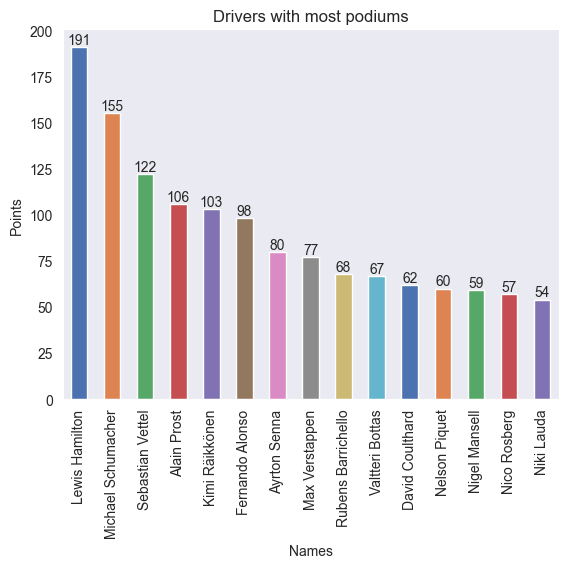

In [37]:
#Most Podiums sorted and plot
drivers_podiums = drivers_positions_reduce.groupby("name")["number"].sum().reset_index(name="podiums")
drivers_podiums_sorted = drivers_podiums.sort_values(by=["podiums"],ascending=False)
plot_podiums= drivers_podiums_sorted.iloc[0:15].plot.bar(x="name",y="podiums",color=sns.color_palette('deep'),legend=False)
#labels
plot_podiums.bar_label(plot_podiums.containers[0])
plot_podiums.set(xlabel="Names",ylabel="Points",title="Drivers with most podiums")
plot_podiums

<AxesSubplot: title={'center': 'Drivers with most podiums'}, xlabel='Names', ylabel='Points'>

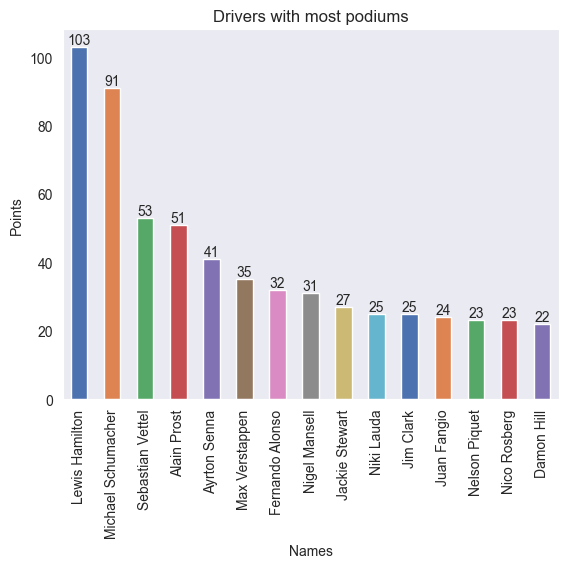

In [38]:
#Most Wins sorted and plot
drivers_wins = drivers_positions_reduce[drivers_positions_reduce["position"]=="1"]
#drivers_wins = drivers_positions_reduce.groupby("name")["number"].sum().reset_index(name="podiums")
drivers_wins_sorted = drivers_wins.sort_values(by=["number"],ascending=False)
plot_wins= drivers_wins_sorted.iloc[0:15].plot.bar(x="name",y="number",color=sns.color_palette('deep'),legend=False)
#labels
plot_wins.bar_label(plot_wins.containers[0])
plot_wins.set(xlabel="Names",ylabel="Points",title="Drivers with most podiums")
plot_wins

In [39]:
drivers_wins = drivers_positions_reduce[drivers_positions_reduce["position"]=="1"]
drivers_wins

,name,position,number
0,Lewis Hamilton,1,103
5,Nico Rosberg,1,23
8,Fernando Alonso,1,32
11,Heikki Kovalainen,1,1
14,Kimi Räikkönen,1,21
...,...,...,...
417,Max Verstappen,1,35
420,Carlos Sainz,1,1
423,Esteban Ocon,1,1
426,Charles Leclerc,1,5


In [57]:
#WriteFiles
drivers_wins.to_csv("data/outputs/drivers_wins.csv", sep=',', index=False)
driver_all_positions.to_csv("data/outputs/driver_all_positions.csv", sep=',', index=False)
drivers_podiums.to_csv("data/outputs/drivers_podiums.csv", sep=',', index=False)
drivers_points_reduce.to_csv("data/outputs/drivers_points.csv", sep=',', index=False)